In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify  # for treemap

In [ ]:
products = {
    "Foundation": [
        ("LES BEIGES", 70), ("ULTRA LE TEINT", 65), ("N°1 DE CHANEL REVITALIZING FOUNDATION", 78),
        ("LES BEIGES (Tint)", 47), ("ULTRA LE TEINT", 68), ("VITALUMIÈRE AQUA", 55),
        ("BOY DE CHANEL", 70), ("ULTRA LE TEINT VELVET", 55)
    ],
    "Bronzer": [
        ("LES BEIGE (Sun-Kissed Powder)", 95), ("LES BEIGES (Healthy Glow Sheer Powder)", 60),
        ("LES BEIGES (Healthy Glow Bronzing Cream)", 60), ("LES BEIGES (Sheer Healthy Glow Highlighting Fluid)", 54),
        ("LES BEIGES (Travel-Size Healthy Glow Bronzing Cream)", 40)
    ],
    "Highlighter": [
        ("DIAMOND DUST", 95), ("BAUME ESSENTIEL", 48), ("POUDRE LUMIÈRE", 60), ("JARDIN IMAGINAIRE", 75),
        ("LE BLANC", 54), ("LES SYMBOLES DE CHANEL LA CHAÎNE", 95), ("LUMIÈRE DE L’OCÉAN", 72)
    ],
    "Blush": [
        ("ENCHANTED NIGHT", 88), ("JOUES CONTRASTE INTENSE", 52), ("LES TAROTS DE CHANEL", 72),
        ("JOUES CONTRASTE", 52), ("N°1 DE CHANEL LIP AND CHEEK BALM", 48), ("ROSES COQUILLAGE", 75),
        ("JARDIN IMAGINAIRE", 75), ("LES 4 ROUGES YEUX ET JOUES", 90)
    ],
    "Powder": [
        ("POUDRE UNIVERSELLE LIBRE", 56), ("POUDRE LUMIÈRE", 60), ("LES BEIGES (Healthy Glow Sun-Kissed Powder)", 95)
    ],
    "Primer": [
        ("N°1 DE CHANEL SKIN ENHANCE", 65), ("LE BLANC DE CHANEL", 54), ("LA BASE ILLUMINATRICE", 54),
        ("LA BASE MATIFIANTE", 54), ("SUBLIMAGE LE SOIN PERFECTEUR", 280)
    ],
    "Concealer": [
        ("LE CORRECTEUR DE CHANEL (Longwear Colour Concealer)", 45), ("LE CORRECTEUR DE CHANEL (Longwear Colour Corrector)", 45)
    ],
    "Brushes and Accessories": [
        ("MIROIR DOUBLE FACETTES", 45), ("LES PINCEAUX DE CHANEL", 60), ("PAPIER MATIFIANT DE CHANEL", 35),
        ("LES PINCEAUX DE CHANEL", 50), ("LES PINCEAUX DE CHANEL", 60), ("LES PINCEAUX DE CHANEL", 60),
        ("LES PINCEAUX DE CHANEL", 60), ("LES PINCEAUX DE CHANEL", 50), ("LES PINCEAUX DE CHANEL", 42)
    ],
    "Mascara": [
        ("LE VOLUME DE CHANEL", 40), ("NOIR ALLURE", 42), ("LA BASE MASCARA", 40), ("INIMITABLE EXTRÊME", 40),
        ("INIMITABLE", 40), ("LE VOLUME DE CHANEL WATERPROOF", 40)
    ],
    "Eyeshadow": [
        ("ENCHANTED NIGHT", 88), ("OMBRE ESSENTIELLE", 40), ("LES 4 OMBRES", 68), ("Stylo Ombre et Contour", 38),
        ("LES BEIGES", 72), ("OMBRE PREMIÈRE LAQUE", 38), ("LES 4 ROUGES YEUX ET JOUES", 90),
        ("LES 4 OMBRES", 68), ("LES 4 OMBRES CORAL TREASURE", 68), ("LES 4 OMBRES RIVAGE", 68)
    ],
    "Eyeliner": [
        ("STYLO YEUX WATERPROOF", 35), ("LE LINER DE CHANEL", 42), ("Stylo Ombre et Contour", 38),
        ("CALLIGRAPHIE DE CHANEL", 40), ("LE CRAYON KHÔL", 35), ("LE CRAYON YEUX", 35), ("SIGNATURE DE CHANEL", 42)
    ],
    "Brow": [
        ("STYLO SOURCILS HAUTE PRÉCISION", 42), ("LE GEL SOURCILS", 38), ("LA PALETTE SOURCILS", 56),
        ("CRAYON SOURCILS", 32), ("STYLO SOURCILS WATERPROOF", 42), ("BOY DE CHANEL", 42)
    ],
    "Lipstick": [
    ("ROUGE COCO BAUME", 45), ("ROUGE ALLURE L'EXTRAIT", 58), ("ROUGE COCO", 48),
    ("ROUGE COCO BLOOM", 48), ("ROUGE ALLURE VELVET NUIT BLANCHE", 50)
    ],
    "Liquid Lipsticks": [
        ("ROUGE ALLURE LIQUID VELVET", 48), ("LE ROUGE DUO ULTRA TENUE", 48), ("ROUGE ALLURE LAQUE", 48),
    ],
    "Lipgloss": [
        ("ROUGE COCO GLOSS (Moisture)", 40), ("ROUGE COCO GLOSS (Top Coat)", 40)
    ],
    "Lip Balm": [
        ("ROUGE COCO BAUME", 45), ("N°1 DE CHANEL LIP AND CHEEK BALM", 48), ("LES BEIGES", 38), ("BOY DE CHANEL", 38),
        ("ROUGE COCO BAUME", 45)
    ],
    "Lip liner": [
        ("LE CRAYON LÈVRES", 35)
    ],
    "Fragrance": [
        ("N°5", 200), ("N°5 L’EAU", 195), ("N°5 EAU PREMIÈRE", 172), ("COCO MADEMOISELLE", 172),
        ("COCO MADEMOISELLE L’EAU PRIVÉE", 145), ("CHANCE EAU FRAÎCHE", 172), ("CHANCE", 172),
        ("CHANCE EAU TENDRE", 172), ("GABRIELLE CHANEL L’EAU", 172), ("GABRIELLE CHANEL ESSENCE", 172),
        ("GABRIELLE CHANEL", 172), ("COCO NOIR", 172), ("COCO", 172), ("COCO NOIR (Parfume)", 305),
        ("ALLURE SENSUELLE", 172), ("ALLURE", 145), ("N°19", 172), ("N°19 POUDRÉ", 172)
    ],
    "Cleansers & Makeup Removers": [
        ("SUBLIMAGE L'HUILE-EN-GEL DE DÉMAQUILLAGE", 115), ("SUBLIMAGE LE SAVON DE SOIN", 110), ("LE GEL", 58),
        ("DÉMAQUILLANT YEUX INTENSE", 40), ("LA MOUSSE", 58), ("LE BLANC", 72), ("N°1 DE CHANEL POWDER-TO-FOAM CLEANSER", 60),
        ("L’HUILE", 55)
    ],
    "Serums": [
        ("SUBLIMAGE L’ESSENCE LUMIÈRE", 505), ("SUBLIMAGE L’ESSENCE FONDAMENTALE", 510),
        ("SUBLIMAGE L’ESSENCE FONDAMENTALE YEUX", 325), ("SUBLIMAGE L’EXTRAIT", 675), ("LE LIFT", 145),
        ("N°1 DE CHANEL REVITALIZING SERUM", 220)
    ],
    "Moisturizers": [
        ("SUBLIMAGE LA CRÈME TEXTURE SUPRÊME", 455), ("LE LIFT CRÈME", 170), ("SUBLIMAGE LE BAUME", 430),
        ("HYDRA BEAUTY CRÈME", 87), ("HYDRA BEAUTY MICRO CRÈME", 100), ("SUBLIMAGE LA CRÈME TEXTURE FINE", 455)
    ],
    "Sun Protection": [
        ("UV ESSENTIEL", 60)
    ],
    "Masks": [
        ("LE MASQUE", 75), ("LE LIFT PRO RETEXTURIZING AHA PEEL", 220), ("N°1 DE CHANEL REVITALIZING MASK", 100),
        ("SUBLIMAGE LA LOTION LUMIÈRE EXFOLIANTE", 185), ("N°1 DE CHANEL REVITALIZING MASK – REFILL", 85),
        ("SUBLIMAGE MASQUE", 250), ("LE LIFT PRO MASQUE UNIFORMITÉ", 220), ("SUBLIMAGE LES GRAINS DE VANILLE", 150),
        ("HYDRA BEAUTY CAMELLIA REPAIR MASK", 72)
    ],
    "Body care": [
        ("LA CRÈME MAIN", 62), ("BODY REPAIR CRÈME", 70), ("LE GOMMAGE", 80), ("HYDRA BEAUTY MICRO GEL", 100),
        ("N°1 DE CHANEL BODY CARE OIL", 135)
    ]
}

In [ ]:
# Define the categories classified as large and small
large_categories = ["Fragrance", "Lips", "Eyes"]

# Define the small categories
small_categories = [
    "Foundation", "Bronzer", "Highlighter", "Blush", "Powder", "Primer",
    "Concealer", "Brushes and Accessories", "Mascara", "Eyeshadow",
    "Eyeliner", "Brow", "Lipstick", "Liquid Lipsticks", "Lipgloss",
    "Lip Balm", "Lip liner", "Cleansers & Makeup Removers",
    "Serums", "Moisturizers", "Sun Protection", "Masks", "Body care"
]

# If you want to verify the large and small category assignments
print("Large Categories:", large_categories)
print("Small Categories:", small_categories)

# Define subcategories within large categories (subgroups under Lips and Eyes)
lips_subcategories = ["Lipstick", "Liquid Lipsticks", "Lipgloss", "Lip Balm", "Lip liner"]
eyes_subcategories = ["Mascara", "Eyeshadow", "Eyeliner", "Brow"]

# Products that are less well-known or not widely recognized by customers
niche_products = [
    ("ULTRA LE TEINT VELVET", 55),
    ("LES SYMBOLES DE CHANEL LA CHAÎNE", 95),
    ("LES 4 ROUGES YEUX ET JOUES", 90),
    ("LA BASE MATIFIANTE", 54),
    ("LES 4 OMBRES RIVAGE", 68),
    ("CALLIGRAPHIE DE CHANEL", 40),
    ("LA PALETTE SOURCILS", 56),
    ("ROUGE ALLURE L'EXTRAIT", 58),
    ("ROUGE ALLURE LIQUID VELVET", 48)
]

Large Categories: ['Fragrance', 'Lips', 'Eyes']
Small Categories: ['Foundation', 'Bronzer', 'Highlighter', 'Blush', 'Powder', 'Primer', 'Concealer', 'Brushes and Accessories', 'Mascara', 'Eyeshadow', 'Eyeliner', 'Brow', 'Lipstick', 'Liquid Lipsticks', 'Lipgloss', 'Lip Balm', 'Lip liner', 'Cleansers & Makeup Removers', 'Serums', 'Moisturizers', 'Sun Protection', 'Masks', 'Body care']


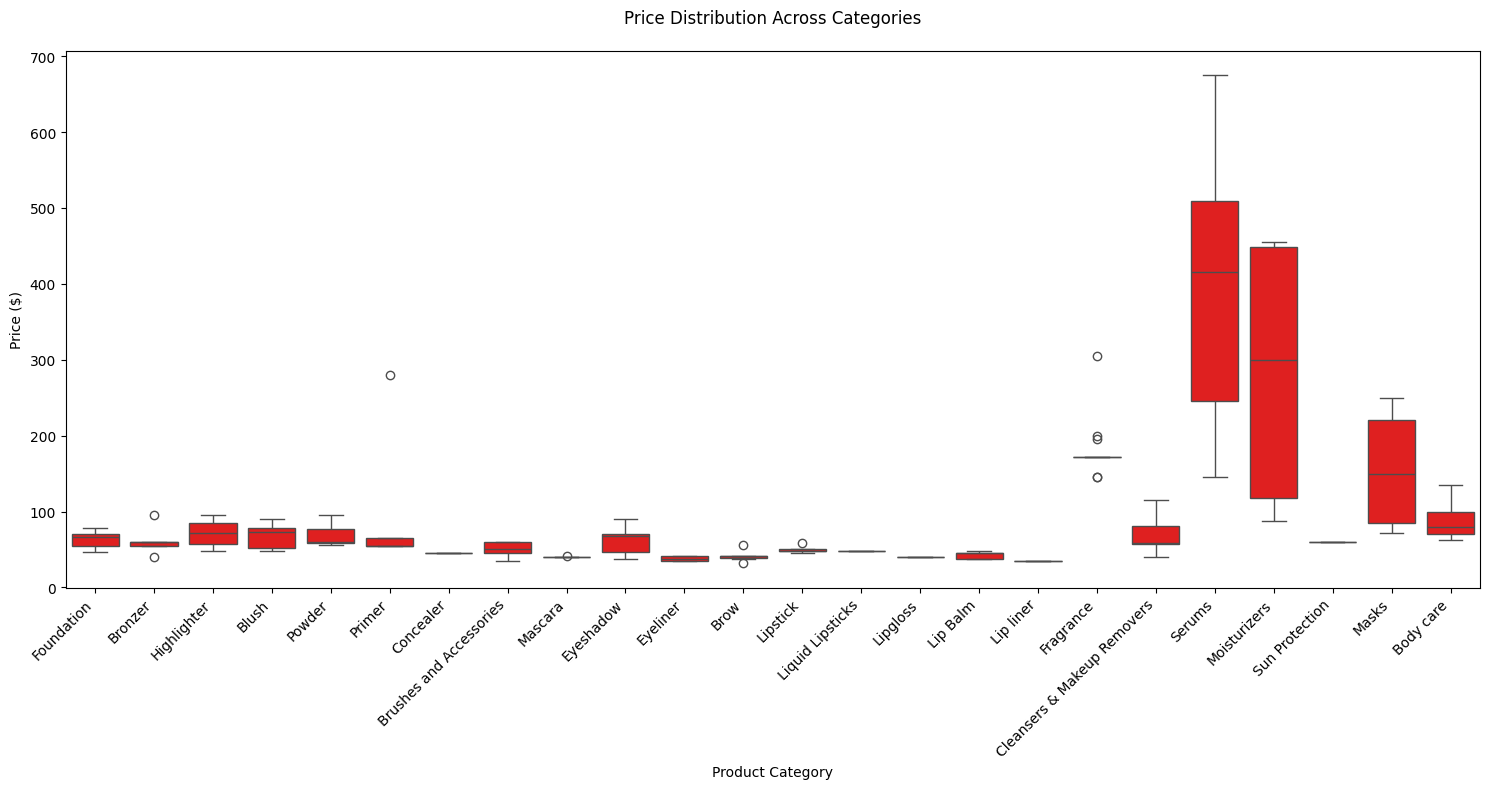

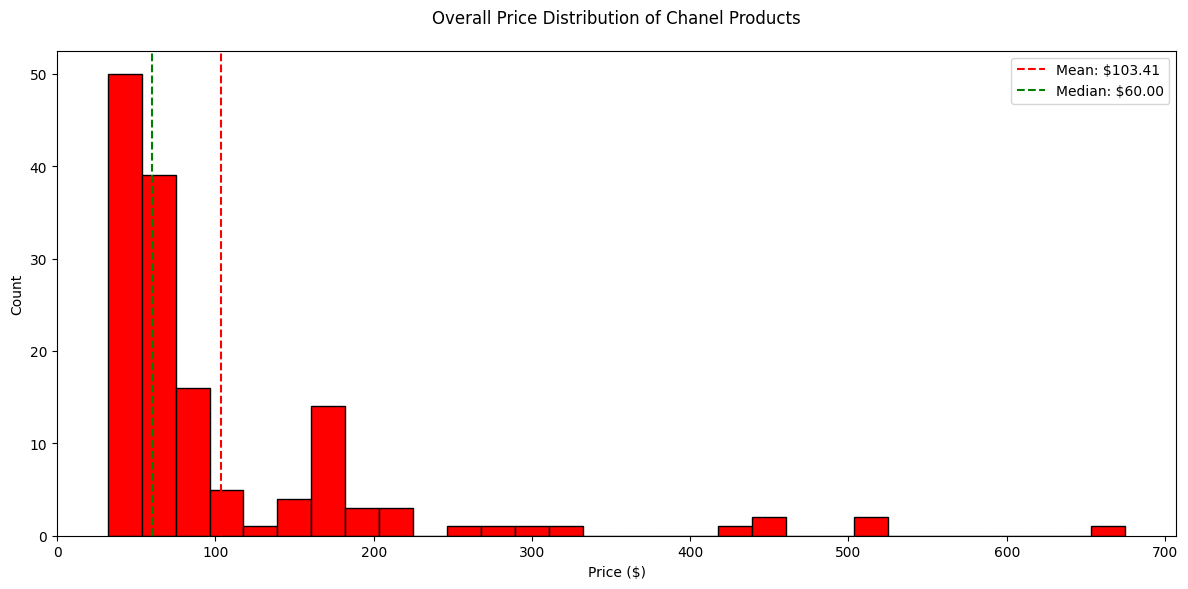

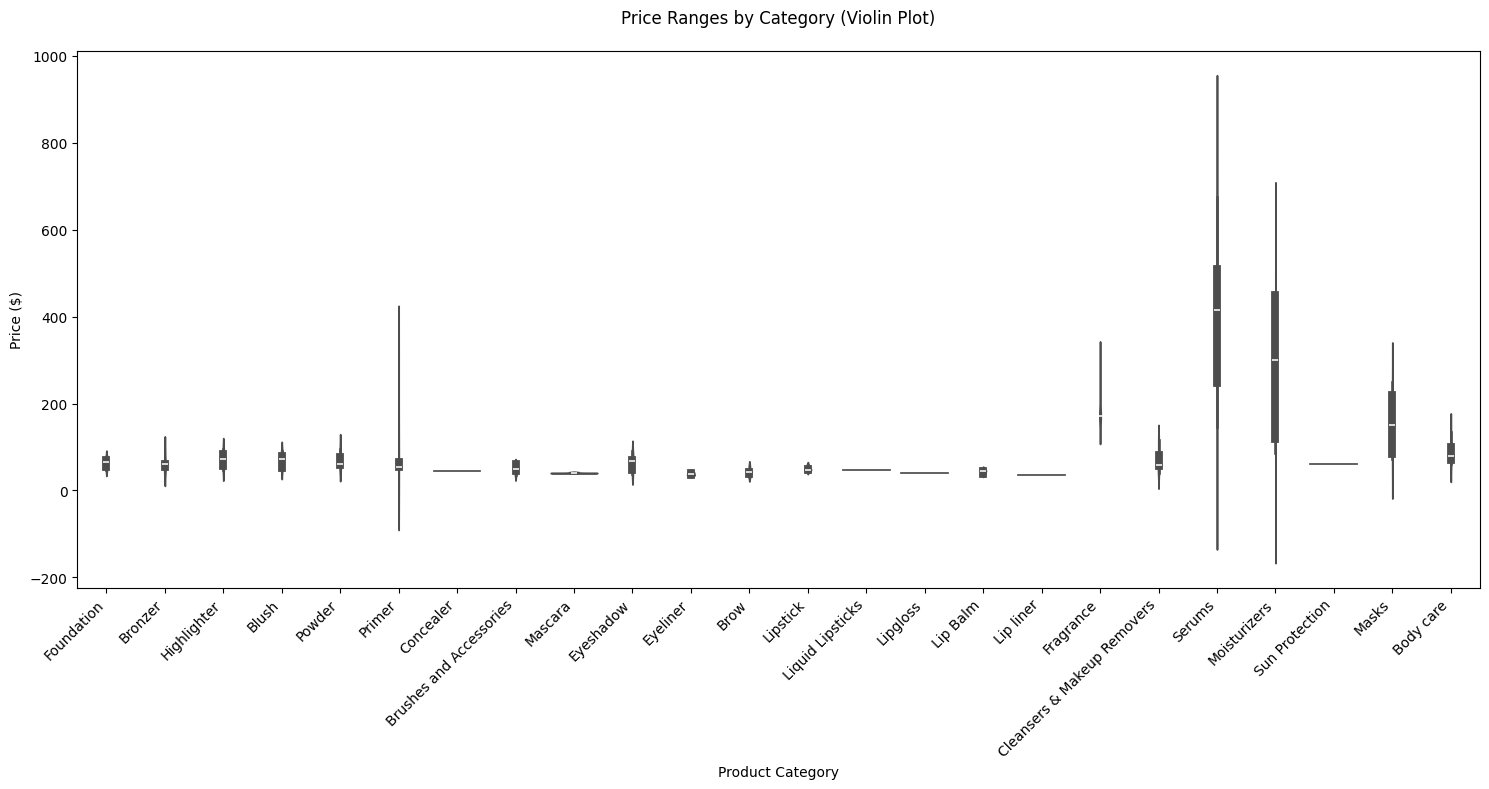


Price Summary Statistics by Category:
                               Mean  Median  Min  Max  Count
Category                                                    
Blush                         69.00    73.5   48   90      8
Body care                     89.40    80.0   62  135      5
Bronzer                       61.80    60.0   40   95      5
Brow                          42.00    42.0   32   56      6
Brushes and Accessories       51.33    50.0   35   60      9
Cleansers & Makeup Removers   71.00    59.0   40  115      8
Concealer                     45.00    45.0   45   45      2
Eyeliner                      38.14    38.0   35   42      7
Eyeshadow                     63.80    68.0   38   90     10
Foundation                    63.50    66.5   47   78      8
Fragrance                    179.22   172.0  145  305     18
Highlighter                   71.29    72.0   48   95      7
Lip Balm                      42.80    45.0   38   48      5
Lip liner                     35.00    35.0   

In [ ]:
# Convert the products dictionary to a DataFrame
def create_product_df(products):
    data = []
    for category, items in products.items():
        for product, price in items:
            data.append({
                'Category': category,
                'Product': product,
                'Price': price
            })
    return pd.DataFrame(data)

# Create DataFrame
df = create_product_df(products)

# Set default matplotlib style instead of seaborn
plt.style.use('default')

# 1. Box Plot
plt.figure(figsize=(15, 8))
plt.title('Price Distribution Across Categories', pad=20)
sns.boxplot(data=df, x='Category', y='Price', color = 'red')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# 2. Histogram
plt.figure(figsize=(12, 6))
plt.title('Overall Price Distribution of Chanel Products', pad=20)
plt.hist(df['Price'], bins=30, edgecolor='black', color = 'red')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.axvline(df['Price'].mean(), color='red', linestyle='dashed',
            label=f'Mean: ${df["Price"].mean():.2f}')
plt.axvline(df['Price'].median(), color='green', linestyle='dashed',
            label=f'Median: ${df["Price"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Violin Plot
plt.figure(figsize=(15, 8))
plt.title('Price Ranges by Category (Violin Plot)', pad=20)
sns.violinplot(data=df, x='Category', y='Price', color = 'red')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# Summary Statistics
summary_stats = df.groupby('Category')['Price'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Count', 'count')
]).round(2)

print("\nPrice Summary Statistics by Category:")
print(summary_stats)

print("\nOverall Price Statistics:")
print(df['Price'].describe().round(2))

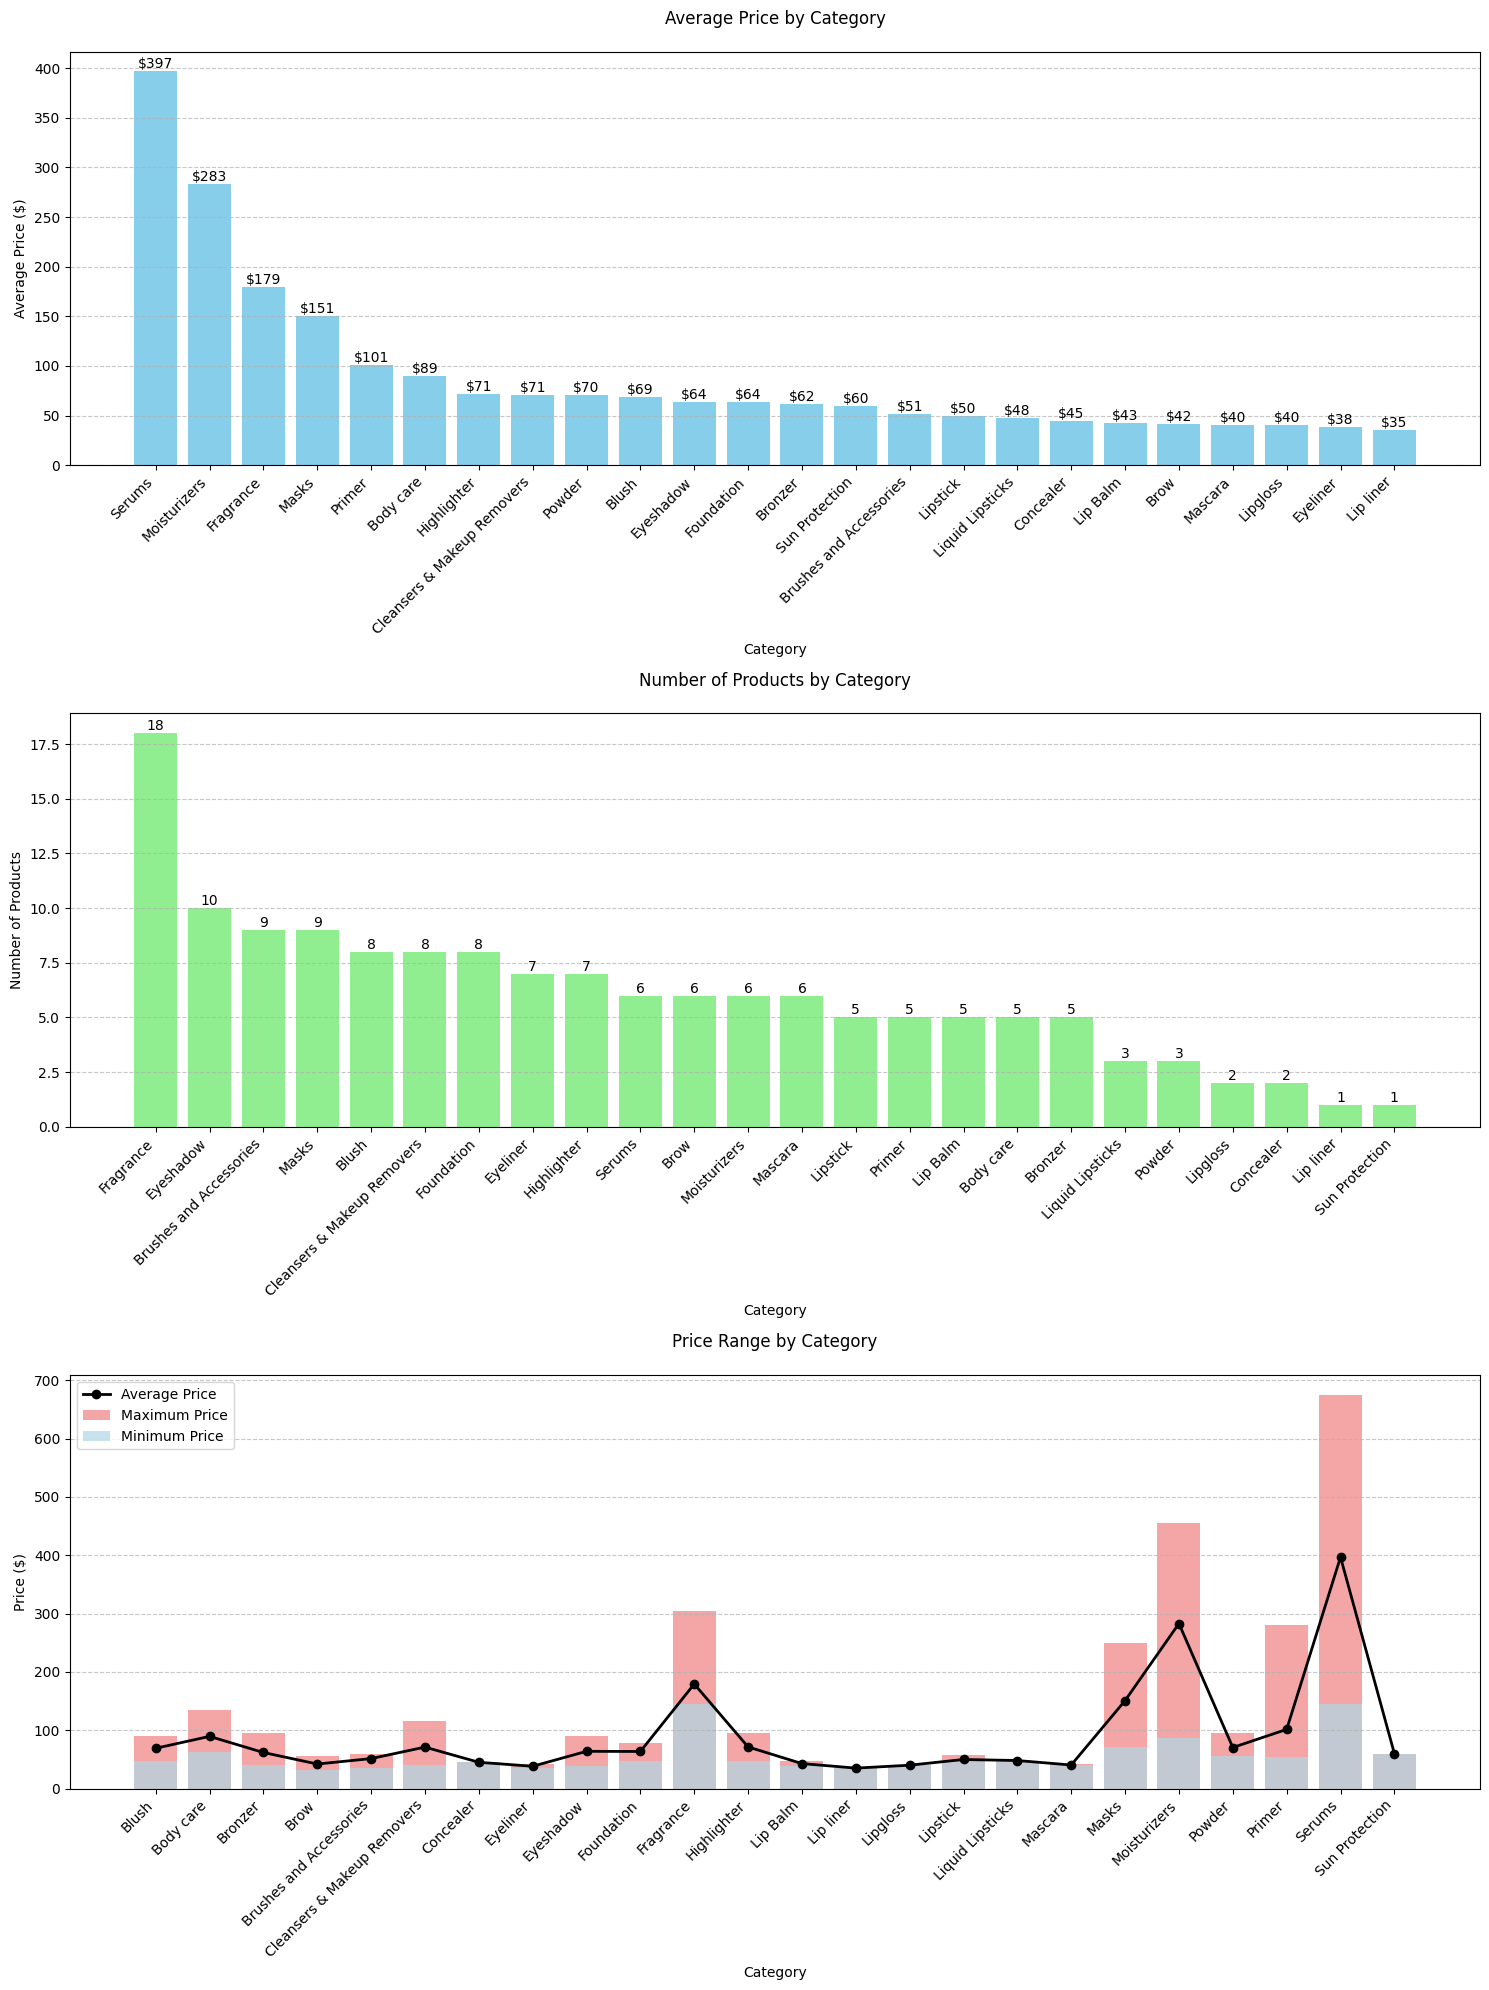


Category Summary Statistics:
                             Avg_Price  Min_Price  Max_Price  Product_Count
Category                                                                   
Blush                            69.00         48         90              8
Body care                        89.40         62        135              5
Bronzer                          61.80         40         95              5
Brow                             42.00         32         56              6
Brushes and Accessories          51.33         35         60              9
Cleansers & Makeup Removers      71.00         40        115              8
Concealer                        45.00         45         45              2
Eyeliner                         38.14         35         42              7
Eyeshadow                        63.80         38         90             10
Foundation                       63.50         47         78              8
Fragrance                       179.22        145        3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
def create_product_df(products):
    data = []
    for category, items in products.items():
        for product, price in items:
            data.append({
                'Category': category,
                'Product': product,
                'Price': price
            })
    return pd.DataFrame(data)

# Create DataFrame
df = create_product_df(products)

# Calculate statistics
category_stats = df.groupby('Category').agg({
    'Price': ['mean', 'min', 'max', 'count']
}).round(2)
category_stats.columns = ['Avg_Price', 'Min_Price', 'Max_Price', 'Product_Count']

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# 1. Average Price by Category
avg_price = category_stats['Avg_Price'].sort_values(ascending=False)
bars1 = ax1.bar(range(len(avg_price)), avg_price, color='skyblue')
ax1.set_title('Average Price by Category', pad=20, fontsize=12)
ax1.set_xlabel('Category')
ax1.set_ylabel('Average Price ($)')
ax1.set_xticks(range(len(avg_price)))
ax1.set_xticklabels(avg_price.index, rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

# 2. Number of Products by Category
product_count = category_stats['Product_Count'].sort_values(ascending=False)
bars2 = ax2.bar(range(len(product_count)), product_count, color='lightgreen')
ax2.set_title('Number of Products by Category', pad=20, fontsize=12)
ax2.set_xlabel('Category')
ax2.set_ylabel('Number of Products')
ax2.set_xticks(range(len(product_count)))
ax2.set_xticklabels(product_count.index, rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# Add value labels on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

# 3. Price Range by Category
categories = category_stats.index
x = np.arange(len(categories))
ax3.bar(x, category_stats['Max_Price'], label='Maximum Price', color='lightcoral', alpha=0.7)
ax3.bar(x, category_stats['Min_Price'], label='Minimum Price', color='lightblue', alpha=0.7)
ax3.plot(x, category_stats['Avg_Price'], 'ko-', label='Average Price', linewidth=2, markersize=6)
ax3.set_title('Price Range by Category', pad=20, fontsize=12)
ax3.set_xlabel('Category')
ax3.set_ylabel('Price ($)')
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=45, ha='right')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCategory Summary Statistics:")
print(category_stats)

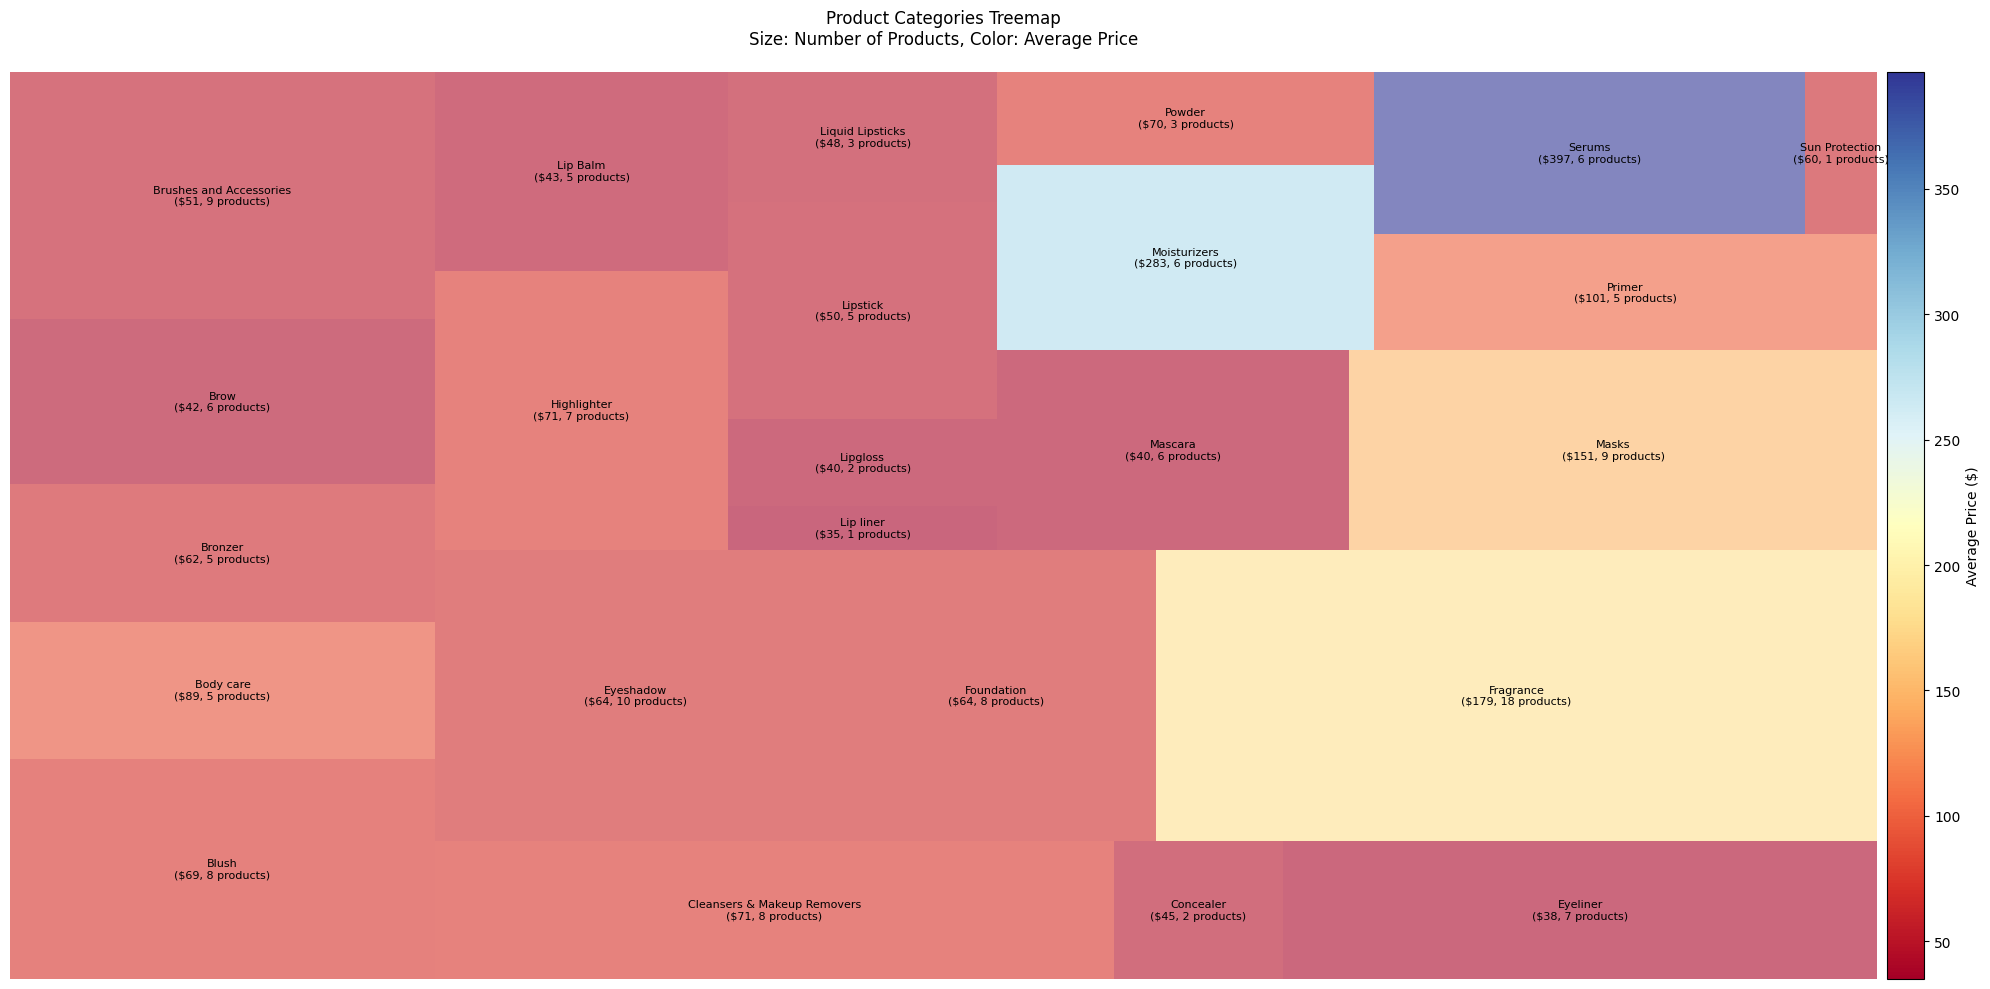


Category Summary Statistics:
                             Avg_Price  Min_Price  Max_Price  Product_Count
Category                                                                   
Blush                            69.00         48         90              8
Body care                        89.40         62        135              5
Bronzer                          61.80         40         95              5
Brow                             42.00         32         56              6
Brushes and Accessories          51.33         35         60              9
Cleansers & Makeup Removers      71.00         40        115              8
Concealer                        45.00         45         45              2
Eyeliner                         38.14         35         42              7
Eyeshadow                        63.80         38         90             10
Foundation                       63.50         47         78              8
Fragrance                       179.22        145        3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data preparation remains the same
def create_product_df(products):
    data = []
    for category, items in products.items():
        for product, price in items:
            data.append({
                'Category': category,
                'Product': product,
                'Price': price
            })
    return pd.DataFrame(data)

# Create DataFrame
df = create_product_df(products)

# Calculate statistics by category
category_stats = df.groupby('Category').agg({
    'Price': ['mean', 'min', 'max', 'count']
}).round(2)
category_stats.columns = ['Avg_Price', 'Min_Price', 'Max_Price', 'Product_Count']

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.title('Product Categories Treemap\nSize: Number of Products, Color: Average Price', pad=20)

# Prepare data for treemap
sizes = category_stats['Product_Count']
colors = category_stats['Avg_Price']
norm = plt.Normalize(colors.min(), colors.max())
colors_normalized = plt.cm.RdYlBu(norm(colors))

# Create treemap
squarify.plot(sizes=sizes,
              label=[f'{cat}\n(${avg:.0f}, {count} products)'
                    for cat, avg, count in zip(category_stats.index,
                                             category_stats['Avg_Price'],
                                             category_stats['Product_Count'])],
              color=colors_normalized,
              alpha=0.6,
              text_kwargs={'fontsize':8},
              ax=ax)

ax.axis('off')

# Add colorbar correctly
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlBu, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax=cax, label='Average Price ($)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCategory Summary Statistics:")
print(category_stats)

print("\nTop 5 Categories by Average Price:")
print(category_stats.sort_values('Avg_Price', ascending=False).head())

print("\nTop 5 Categories by Number of Products:")
print(category_stats.sort_values('Product_Count', ascending=False).head())

print("\nTop 5 Categories by Price Range (Max - Min):")
category_stats['Price_Range'] = category_stats['Max_Price'] - category_stats['Min_Price']
print(category_stats.sort_values('Price_Range', ascending=False).head())

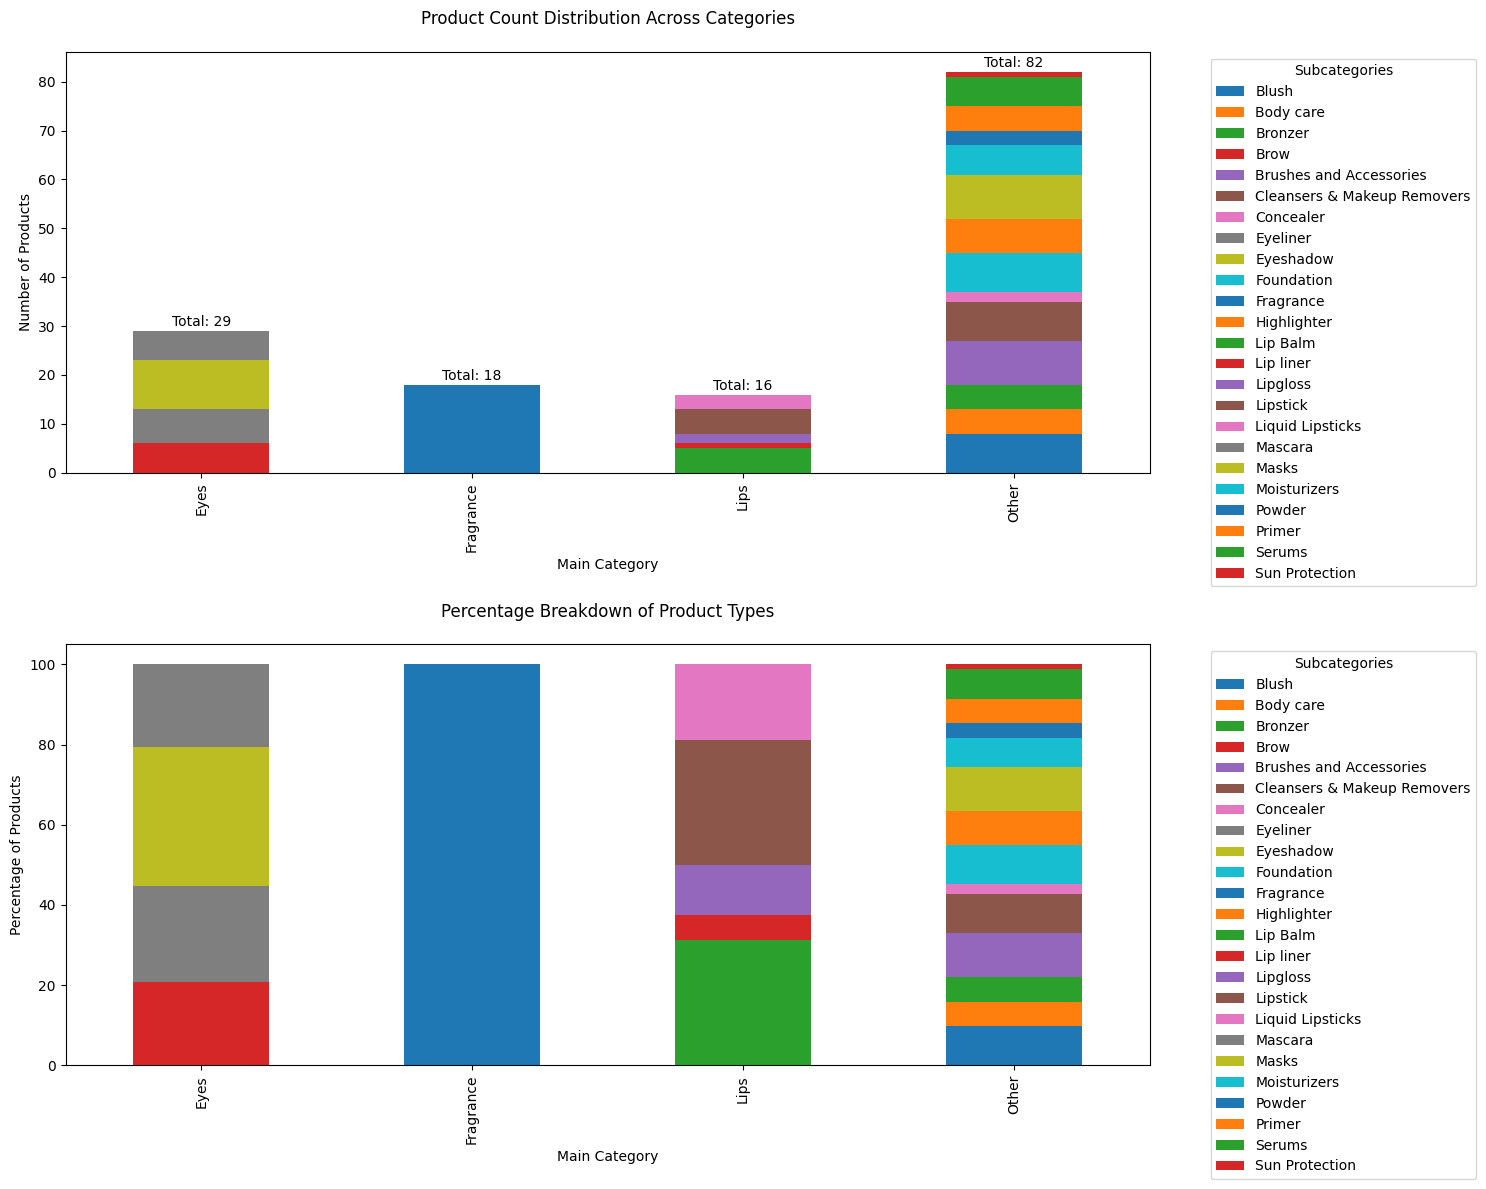


Product Count by Main Category:
Main_Category
Eyes         29
Fragrance    18
Lips         16
Other        82
Name: Product, dtype: int64

Detailed Distribution:
Main_Category  Category                   
Eyes           Brow                            6
               Eyeliner                        7
               Eyeshadow                      10
               Mascara                         6
Fragrance      Fragrance                      18
Lips           Lip Balm                        5
               Lip liner                       1
               Lipgloss                        2
               Lipstick                        5
               Liquid Lipsticks                3
Other          Blush                           8
               Body care                       5
               Bronzer                         5
               Brushes and Accessories         9
               Cleansers & Makeup Removers     8
               Concealer                       2
          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
def create_product_df(products):
    data = []
    for category, items in products.items():
        # Determine main category
        main_cat = 'Other'
        if category in eyes_subcategories:
            main_cat = 'Eyes'
        elif category in lips_subcategories:
            main_cat = 'Lips'
        elif category == 'Fragrance':
            main_cat = 'Fragrance'

        for product, price in items:
            data.append({
                'Category': category,
                'Main_Category': main_cat,
                'Product': product,
                'Price': price
            })
    return pd.DataFrame(data)

# Create DataFrame
df = create_product_df(products)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. Absolute Count Distribution
category_counts = df.pivot_table(
    index='Main_Category',
    columns='Category',
    values='Product',
    aggfunc='count',
    fill_value=0
)

category_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Product Count Distribution Across Categories', pad=20)
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Number of Products')
ax1.legend(title='Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total counts
totals = category_counts.sum(axis=1)
for i, total in enumerate(totals):
    ax1.text(i, total + 1, f'Total: {int(total)}', ha='center')

# 2. Percentage Distribution
percentage_data = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
percentage_data.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Percentage Breakdown of Product Types', pad=20)
ax2.set_xlabel('Main Category')
ax2.set_ylabel('Percentage of Products')
ax2.legend(title='Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nProduct Count by Main Category:")
print(df.groupby('Main_Category')['Product'].count())
print("\nDetailed Distribution:")
print(df.groupby(['Main_Category', 'Category'])['Product'].count().round(2))

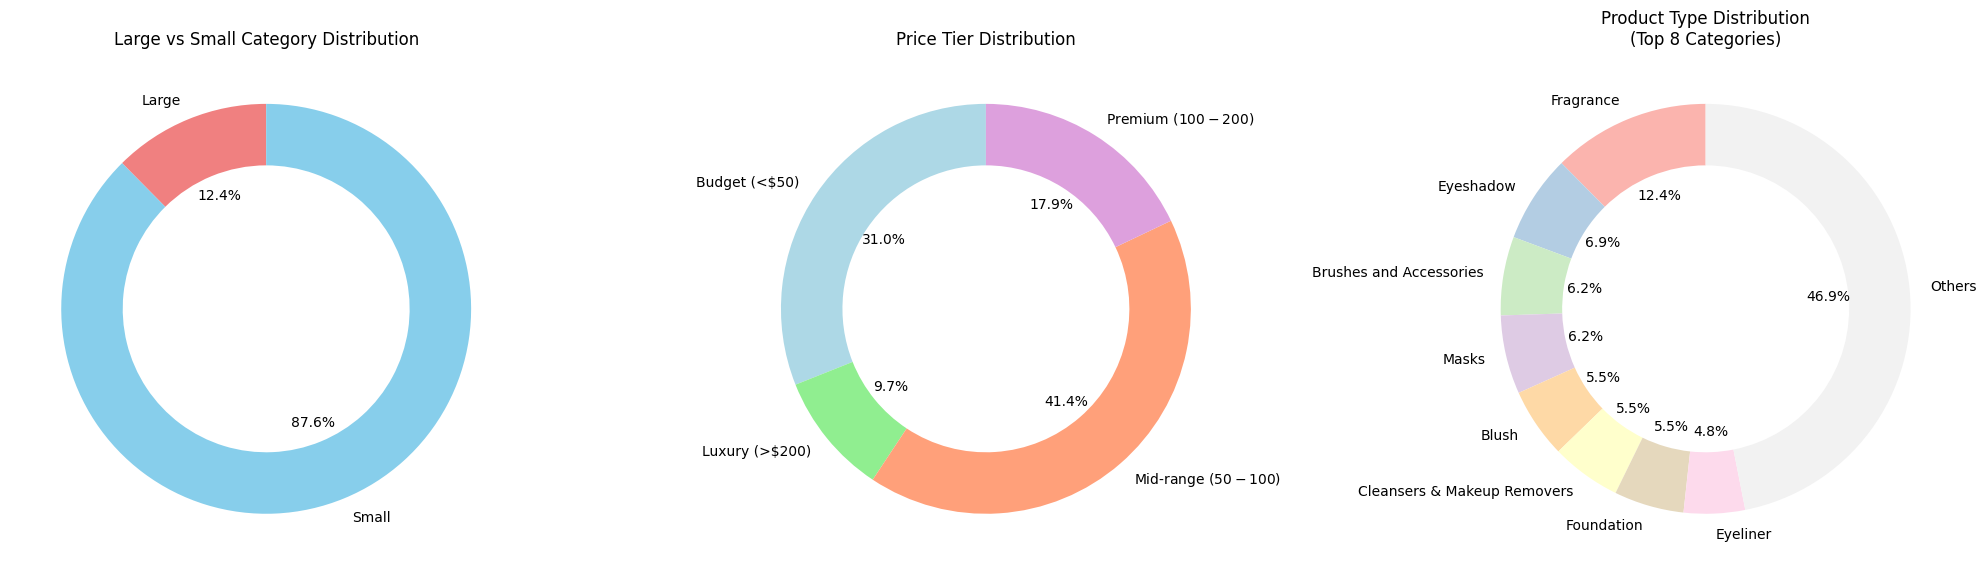


Category Size Distribution:
Category_Size
Large     18
Small    127
Name: Product, dtype: int64

Price Tier Distribution:
Price_Tier
Budget (<$50)           45
Luxury (>$200)          14
Mid-range ($50-$100)    60
Premium ($100-$200)     26
Name: Product, dtype: int64

Product Type Distribution (Top 8 + Others):
Fragrance                      18
Eyeshadow                      10
Brushes and Accessories         9
Masks                           9
Blush                           8
Cleansers & Makeup Removers     8
Foundation                      8
Eyeliner                        7
Others                         68
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
def create_product_df(products):
    data = []
    for category, items in products.items():
        # Determine category size
        cat_size = 'Small'
        if category in large_categories:
            cat_size = 'Large'

        for product, price in items:
            # Determine price tier
            if price < 50:
                price_tier = 'Budget (<$50)'
            elif price < 100:
                price_tier = 'Mid-range ($50-$100)'
            elif price < 200:
                price_tier = 'Premium ($100-$200)'
            else:
                price_tier = 'Luxury (>$200)'

            data.append({
                'Category': category,
                'Category_Size': cat_size,
                'Product': product,
                'Price': price,
                'Price_Tier': price_tier
            })
    return pd.DataFrame(data)

# Create DataFrame
df = create_product_df(products)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# 1. Large vs Small Category Distribution
category_size_dist = df.groupby('Category_Size')['Product'].count()
ax1.pie(category_size_dist, labels=category_size_dist.index, autopct='%1.1f%%',
        colors=['lightcoral', 'skyblue'], startangle=90,
        wedgeprops=dict(width=0.3))
ax1.set_title('Large vs Small Category Distribution')

# 2. Price Tier Distribution
price_dist = df.groupby('Price_Tier')['Product'].count()
ax2.pie(price_dist, labels=price_dist.index, autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'lightsalmon', 'plum'],
        startangle=90, wedgeprops=dict(width=0.3))
ax2.set_title('Price Tier Distribution')

# 3. Product Type Distribution
type_dist = df.groupby('Category')['Product'].count().sort_values(ascending=False)
# Take top 8 categories and group others
top_8 = type_dist[:8]
others = pd.Series({'Others': type_dist[8:].sum()})
type_dist_final = pd.concat([top_8, others])

colors = plt.cm.Pastel1(np.linspace(0, 1, len(type_dist_final)))
ax3.pie(type_dist_final, labels=type_dist_final.index, autopct='%1.1f%%',
        colors=colors, startangle=90, wedgeprops=dict(width=0.3))
ax3.set_title('Product Type Distribution\n(Top 8 Categories)')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nCategory Size Distribution:")
print(category_size_dist)
print("\nPrice Tier Distribution:")
print(price_dist)
print("\nProduct Type Distribution (Top 8 + Others):")
print(type_dist_final)

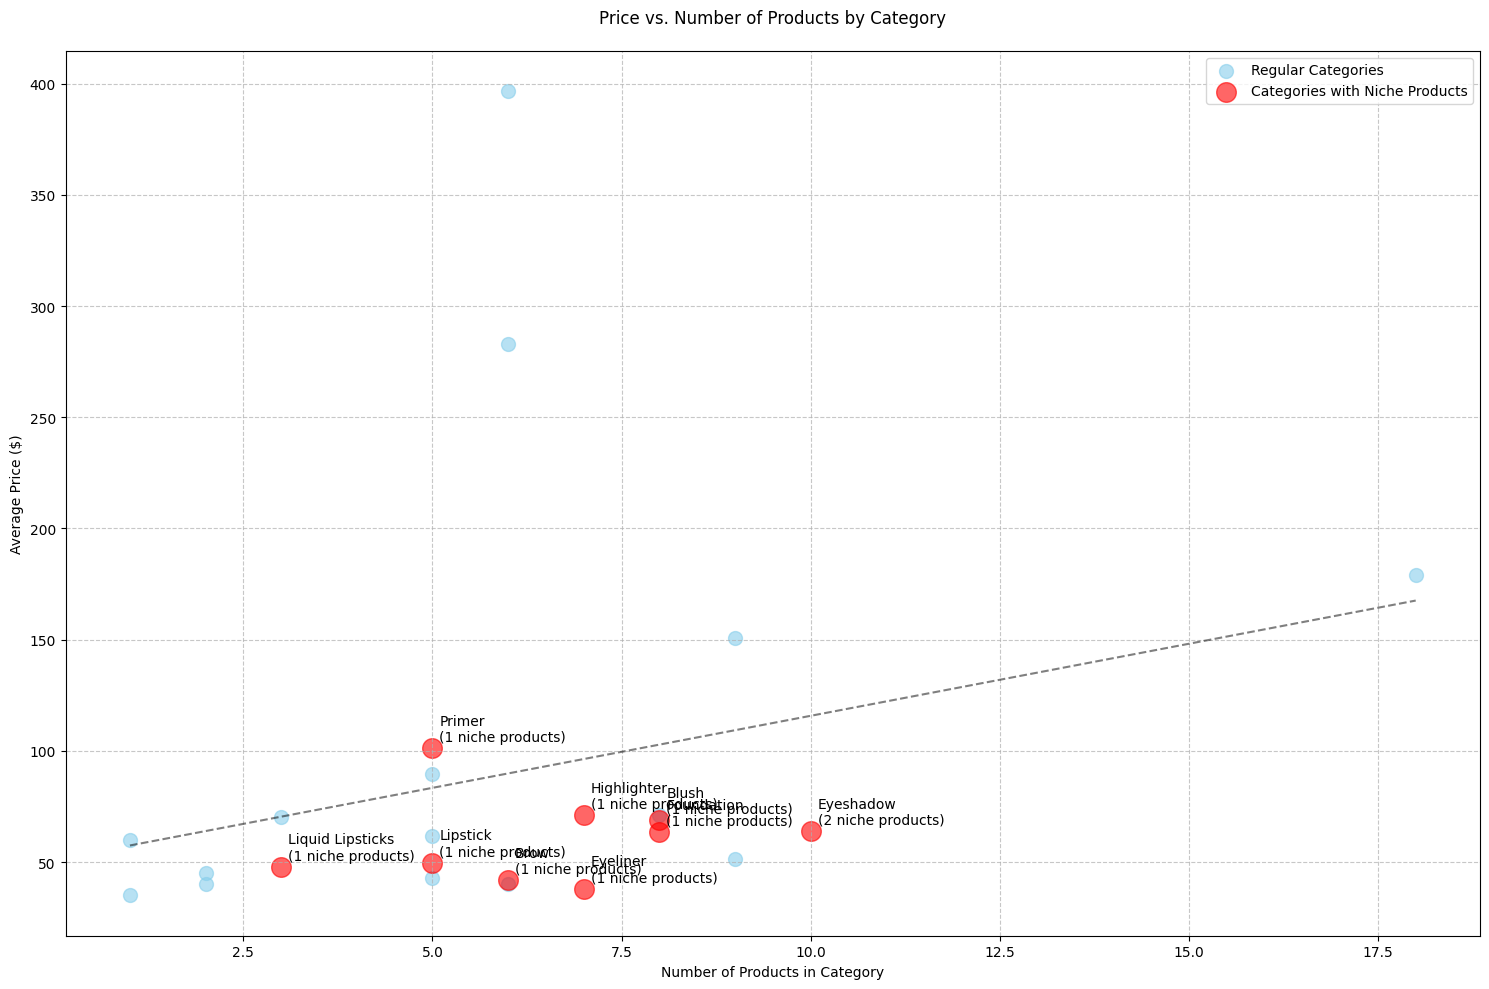


Correlation between product count and average price: 0.27

Categories with Niche Products:
                  product_count   avg_price  niche_count
Foundation                    8   63.500000            1
Highlighter                   7   71.285714            1
Blush                         8   69.000000            1
Primer                        5  101.400000            1
Eyeshadow                    10   63.800000            2
Eyeliner                      7   38.142857            1
Brow                          6   42.000000            1
Lipstick                      5   49.800000            1
Liquid Lipsticks              3   48.000000            1


In [ ]:
# Data preparation
def create_analysis_df(products, niche_products):
    # Create category statistics
    category_stats = {}
    for category, items in products.items():
        prices = [price for _, price in items]
        niche_count = sum(1 for product, price in items
                         if (product, price) in niche_products)
        category_stats[category] = {
            'avg_price': np.mean(prices),
            'product_count': len(items),
            'niche_count': niche_count
        }
    return pd.DataFrame.from_dict(category_stats, orient='index')

# Create DataFrame
df = create_analysis_df(products, niche_products)

# Create scatter plot
plt.figure(figsize=(15, 10))

# Plot non-niche categories
plt.scatter(df[df['niche_count'] == 0]['product_count'],
           df[df['niche_count'] == 0]['avg_price'],
           c='skyblue',
           s=100,
           alpha=0.6,
           label='Regular Categories')

# Plot categories with niche products
plt.scatter(df[df['niche_count'] > 0]['product_count'],
           df[df['niche_count'] > 0]['avg_price'],
           c='red',
           s=200,
           alpha=0.6,
           label='Categories with Niche Products')

# Add labels for categories with niche products
for idx in df[df['niche_count'] > 0].index:
    plt.annotate(f'{idx}\n({df.loc[idx, "niche_count"]} niche products)',
                (df.loc[idx, 'product_count'], df.loc[idx, 'avg_price']),
                xytext=(5, 5),
                textcoords='offset points')

# Customize plot
plt.title('Price vs. Number of Products by Category', pad=20)
plt.xlabel('Number of Products in Category')
plt.ylabel('Average Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add trend line
z = np.polyfit(df['product_count'], df['avg_price'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['product_count'].min(), df['product_count'].max(), 100)
plt.plot(x_trend, p(x_trend), "k--", alpha=0.5, label='Trend Line')

plt.tight_layout()
plt.show()

# Print correlation coefficient
correlation = df['product_count'].corr(df['avg_price'])
print(f"\nCorrelation between product count and average price: {correlation:.2f}")

# Print summary statistics
print("\nCategories with Niche Products:")
niche_categories = df[df['niche_count'] > 0]
print(niche_categories[['product_count', 'avg_price', 'niche_count']])

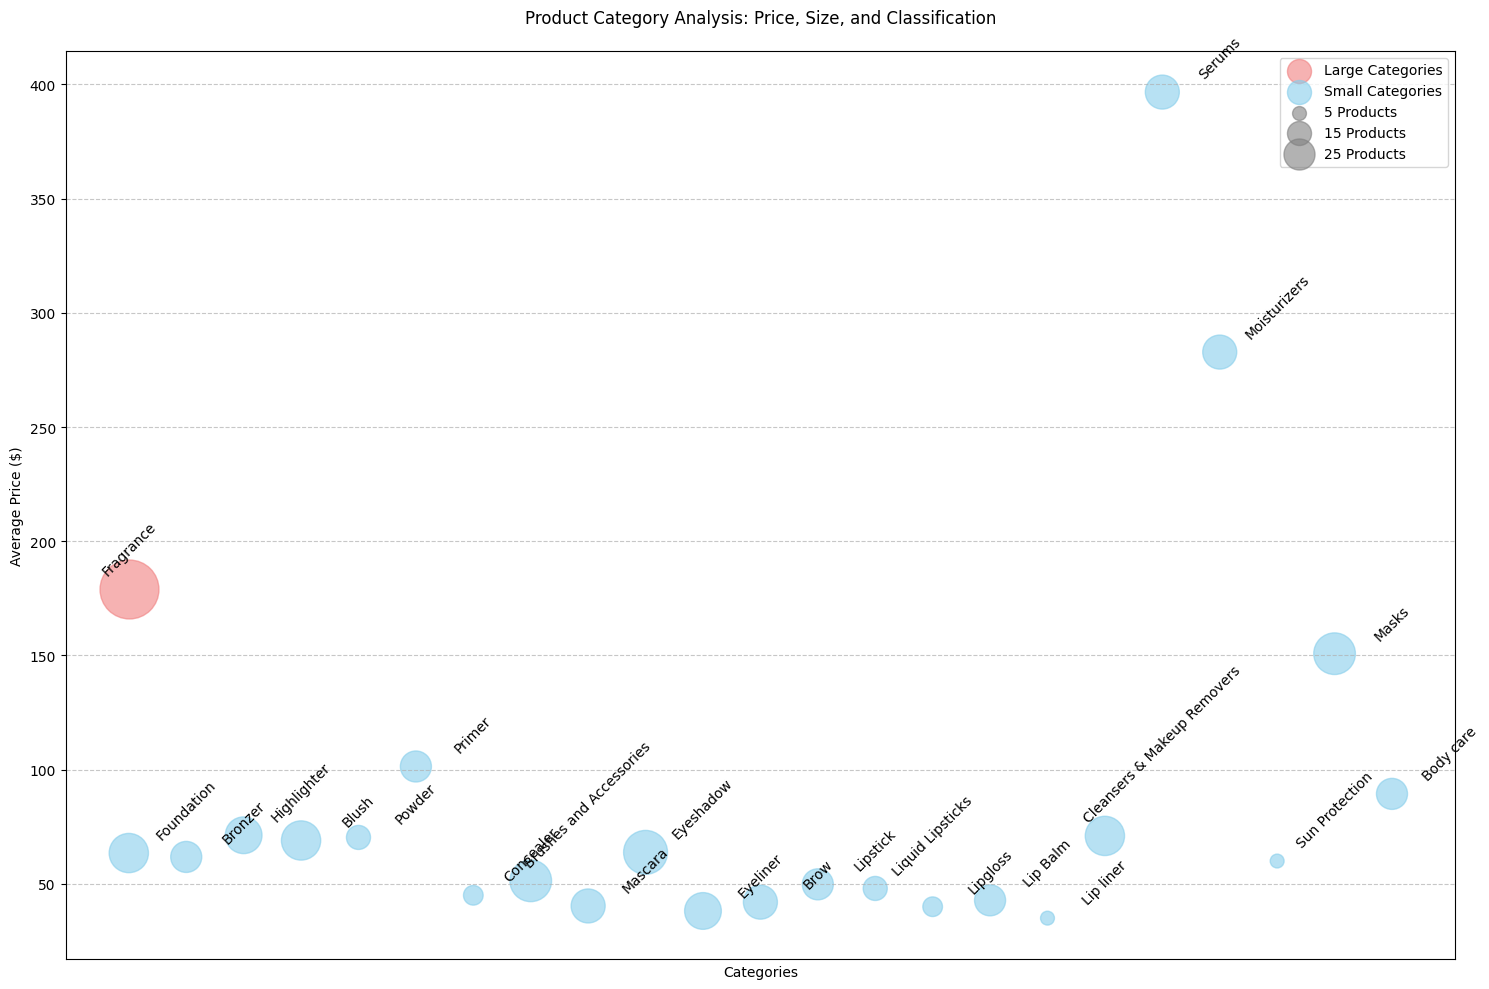


Category Statistics:
                              avg_price  product_count category_type
Serums                       396.666667              6         Small
Moisturizers                 282.833333              6         Small
Fragrance                    179.222222             18         Large
Masks                        150.777778              9         Small
Primer                       101.400000              5         Small
Body care                     89.400000              5         Small
Highlighter                   71.285714              7         Small
Cleansers & Makeup Removers   71.000000              8         Small
Powder                        70.333333              3         Small
Blush                         69.000000              8         Small
Eyeshadow                     63.800000             10         Small
Foundation                    63.500000              8         Small
Bronzer                       61.800000              5         Small
Sun Protecti

In [ ]:
# Data preparation
def create_analysis_df(products, large_categories):
    category_stats = {}
    for category, items in products.items():
        prices = [price for _, price in items]
        category_stats[category] = {
            'avg_price': np.mean(prices),
            'product_count': len(items),
            'category_type': 'Large' if category in large_categories else 'Small'
        }
    return pd.DataFrame.from_dict(category_stats, orient='index')

# Create DataFrame
df = create_analysis_df(products, large_categories)

# Create bubble chart
plt.figure(figsize=(15, 10))

# Create scatter plot with bubbles
colors = {'Large': 'lightcoral', 'Small': 'skyblue'}

# Plot bubbles for each category type
for category_type in ['Large', 'Small']:
    mask = df['category_type'] == category_type
    plt.scatter(np.arange(sum(mask)),
               df[mask]['avg_price'],
               s=df[mask]['product_count'] * 100,  # Scale bubble size
               c=colors[category_type],
               alpha=0.6,
               label=f'{category_type} Categories')

# Customize plot
plt.title('Product Category Analysis: Price, Size, and Classification', pad=20)
plt.xlabel('Categories')
plt.ylabel('Average Price ($)')

# Add category labels
x_positions = []
current_pos = 0
for category_type in ['Large', 'Small']:
    mask = df['category_type'] == category_type
    subset = df[mask]
    for idx in subset.index:
        plt.annotate(idx,
                    (current_pos, subset.loc[idx, 'avg_price']),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    rotation=45)
        x_positions.append(current_pos)
        current_pos += 1

# Add legend with custom entries
legend_elements = [
    plt.scatter([], [], c=colors['Large'], s=300, label='Large Categories', alpha=0.6),
    plt.scatter([], [], c=colors['Small'], s=300, label='Small Categories', alpha=0.6),
    plt.scatter([], [], c='gray', s=100, label='5 Products', alpha=0.6),
    plt.scatter([], [], c='gray', s=300, label='15 Products', alpha=0.6),
    plt.scatter([], [], c='gray', s=500, label='25 Products', alpha=0.6)
]
plt.legend(handles=legend_elements, loc='upper right')

# Customize axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([])  # Hide x-axis ticks since we have category labels

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCategory Statistics:")
print(df.sort_values('avg_price', ascending=False))

# Print average metrics by category type
print("\nAverage Metrics by Category Type:")
print(df.groupby('category_type').agg({
    'avg_price': 'mean',
    'product_count': ['mean', 'sum']
}).round(2))